#Spectral clustering for MINST dataset - Version 0.0# 
$N$: number of data points

$K$: number of clusters


##Road Map##
1. Input data and label
2. Compute similarity matrix $M$ with some kernel (say, Gaussian kernel), apply some thereshold to get adjacency matrix $W$
3. Compute the Laplacian matrix $L=D-W$ of the graph (every node represents one data point)
4. Find the eigenvectors corresponding to the $K$ minimal eigenvalues of $L$ and construct matrix $H$ ($N$ × $K$)
5. Apply K-means algrithm to classify rows of $H$

In [ ]:
# Test block
a = [1,2,3,4]
b = [1,1,1,2]
np.exp(-1.6)

0.20189651799465538

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import random

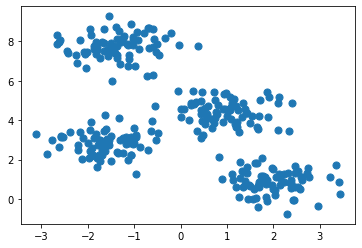

In [ ]:
# Import data and label
#X, y_true = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
#X = np.array(X)
N = 300;
K = 4;
X, y_true= datasets.make_blobs(n_samples=N, centers=K, cluster_std=0.6, random_state=0, n_features=2)
plt.scatter(X[:,0],X[:,1],s=50)

In [ ]:
def Adjacency_GaussianKernel(X):
  W = np.zeros([N,N])
  M = np.zeros([N,N])
  epsilon = 0.2
  gamma = 0.01
  for i in range(N):
    for j in range(N):
      temp = np.inner( (X[i,:]-X[j,:]), (X[i,:]-X[j,:]) )
      M[i,j] = np.exp(-gamma*temp)
      if M[i,j]>epsilon:
        W[i,j] = 1
  return W

def Laplacian(X):
  D = np.zeros([N,N])
  W = Adjacency_GaussianKernel(X)
  for i in range(N):
    for j in range(N):
      D[i,i] = D[i,i]+W[i,j]
  L = D - W
  return D,L

def H_constrcution(X):
  H = np.zeros([K,N])
  D,L = Laplacian(X)
  eigenValues, eigenVectors = np.linalg.eig(L)
  idx = eigenValues.argsort()[::1]
  eigenValues = eigenValues[idx]
  eigenVectors = eigenVectors[:,idx]
  for i in range(K):
    H[i] = eigenVectors[i]
  H = H.T
  return H

In [ ]:
# Regrad each row of matrix H as a data point
# Classify these rows by K-means

def K_means_clustering_standard_SED(X,k):
  #Initialize centroids
  N=len(X)
  centroids_index = random.sample(range(N), k) #Note : the impact of the seed (cf paper) // try with predefined index, and different seeds maybe if time
  centroids=X[centroids_index]
  clusters = asign_clusters(centroids,X,k) #asign to cluster
  new_centroids=update_centroids(centroids, clusters,X,k)
  while loss(centroids,clusters,X,k)!= loss(new_centroids,asign_clusters(new_centroids,X,k),X,k): #while the centroids change, then (1) is improving by construction 
    centroids=new_centroids.copy()#copy using deep copy
    clusters = asign_clusters(centroids,X,k) #asign to cluster
    new_centroids=update_centroids(centroids,clusters, X,k)
  return centroids

def loss(centroids,clusters,X,k):
  loss=0
  for l in range(k):
    for i in clusters[l]:
      loss+=np.inner(X[i]-centroids[l],X[i]-centroids[l])
  return loss

def update_centroids(centroids,clusters, X,k):
  new_centroids=[0]*len(centroids)
  for l in range(k):
    new_centroids[l]=sommer(X[clusters[l]])/len(clusters[l]) #à voir si on peut faire ca avec les database...
  return new_centroids

def asign_clusters(centroids,X,k): #We do the argmin of the standard squared euclidian norm 
  clusters=[[] for i in range(k)]
  for i in range(len(X)): #for each xi REVOIR LES INDICES
    sed=[np.inner(X[i]-centroids[j],X[i]-centroids[j]) for j in range(k)]
    clusters[np.argmin(sed)].append(i)
  return clusters

def sommer(list_of_list):
  Somme= [0]*len(list_of_list[0])
  for i in range(len(list_of_list)):
    Somme=np.add(list_of_list[i],Somme)
  return Somme

In [ ]:
k=4
random.seed(1000)
H = H_constrcution(X)
centroids=K_means_clustering_standard_SED(H,k)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part


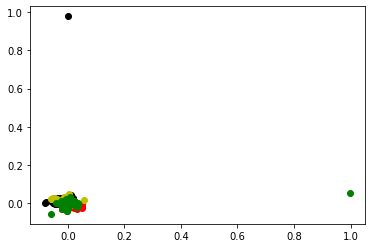

In [ ]:
"""result in centroids
we want to print some cluster to see how they look like"""
clusters = asign_clusters(centroids,H,k) #cluster result


cols=['k','r','y','g']
plt.figure()
for l in range(K):
    for point in clusters[l]:
        plt.scatter(H[point, 0],H[point, 1],  c=cols[l])
plt.show()